In [1]:
# Date: 21/December/2022 - Wednesday
# Author: Virgilio Murillo Ochoa
# personal github: Virgilio-AI
# linkedin: https://www.linkedin.com/in/virgilio-murillo-ochoa-b29b59203
# contact: data_scientist@virgiliomurillo.com
# web: virgiliomurillo.com

In [2]:
import pandas as pd
import time
import datetime

In [3]:
prev = datetime.datetime.now()
description = pd.read_csv("Course_info.csv", index_col = 0)
now = datetime.datetime.now()
print(now - prev)

0:00:00.866865


In [4]:
prev = datetime.datetime.now()
comments = pd.read_csv("Comments.csv")
now = datetime.datetime.now()
print(now - prev)

0:00:16.606438


In [5]:
# change the dataframe data type
prev = datetime.datetime.now()
description['num_subscribers'] = description['num_subscribers'].astype('int64')
description['num_reviews'] = description['num_reviews'].astype('int64')
description['num_comments'] = description['num_comments'].astype('int64')
description['num_lectures'] = description['num_lectures'].astype('int64')
description['num_reviews'] = description['num_reviews'].astype('int64')
description['published_time'] = pd.to_datetime(description['published_time'])
description['last_update_date'] = pd.to_datetime(description['last_update_date'])


# get the username from instructor url
description['instructor_url'] = description['instructor_url'].str[6:-2]

# get the name of the course
description['course_url'] = description['course_url'].str[8:-1]

# rename the column named 'instructor_url' to 'instructor_username'
description.rename(columns = {'instructor_url':'instructor_username'}, inplace = True)


now = datetime.datetime.now()
print(now - prev)

0:00:00.207636


In [6]:
description.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 209734 entries, 4715.0 to 4914054.0
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   title                209734 non-null  object             
 1   is_paid              209734 non-null  bool               
 2   price                209734 non-null  float64            
 3   headline             209707 non-null  object             
 4   num_subscribers      209734 non-null  int64              
 5   avg_rating           209734 non-null  float64            
 6   num_reviews          209734 non-null  int64              
 7   num_comments         209734 non-null  int64              
 8   num_lectures         209734 non-null  int64              
 9   content_length_min   209734 non-null  float64            
 10  published_time       209734 non-null  datetime64[ns, UTC]
 11  last_update_date     209597 non-null  datetime64[ns]   

In [7]:
description.describe()

,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min
count,209734.000000,2.097340e+05,209734.000000,209734.000000,209734.000000,209734.000000,209734.000000
mean,81.665529,3.096992e+03,3.747179,244.358812,44.874589,36.548395,265.558856
std,117.317846,1.558132e+04,1.533711,2458.098276,355.773107,51.871962,454.448676
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.990000,2.600000e+01,3.800000,3.000000,1.000000,11.000000,69.000000
50%,34.990000,2.060000e+02,4.333334,17.000000,5.000000,22.000000,133.000000
75%,99.990000,1.435000e+03,4.625000,74.000000,18.000000,42.000000,289.000000
max,999.990000,1.752364e+06,5.000000,436457.000000,39040.000000,1095.000000,22570.000000


In [8]:
description.head()

,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_username
id,,,,,,,,,,,,,,,,,,,
4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231,3.75,134,42,37,1268.0,2010-08-05 22:06:13+00:00,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,vegan-vegetarian-cooking-school,Angela Poch,angelapoc
1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474,4.50,709,112,9,88.0,2010-01-12 18:09:46+00:00,NaT,Business,Entrepreneurship,Lean Startup,English,the-lean-startup-debunking-myths-of-entreprene...,Eric Ries,ericrie
5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713,4.40,41,13,14,82.0,2010-10-13 18:07:17+00:00,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,see-my-personal-motivation-for-becoming-vegeta...,Angela Poch,angelapoc
7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988,4.80,395,88,36,1511.0,2011-06-20 20:08:38+00:00,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,complete-dunbar-collection,Ian Dunbar,ian-dunba
8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266,4.75,38,12,38,569.0,2011-06-23 18:31:20+00:00,NaT,Design,Web Design,Web Design,English,web-design-from-the-ground-up,E Learning Lab,edwin-ang-


In [9]:
english_dataframe = description[description['language'] == 'English' ] 

In [10]:
english_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 123921 entries, 4715.0 to 4914054.0
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   title                123921 non-null  object             
 1   is_paid              123921 non-null  bool               
 2   price                123921 non-null  float64            
 3   headline             123905 non-null  object             
 4   num_subscribers      123921 non-null  int64              
 5   avg_rating           123921 non-null  float64            
 6   num_reviews          123921 non-null  int64              
 7   num_comments         123921 non-null  int64              
 8   num_lectures         123921 non-null  int64              
 9   content_length_min   123921 non-null  float64            
 10  published_time       123921 non-null  datetime64[ns, UTC]
 11  last_update_date     123794 non-null  datetime64[ns]   

In [11]:
instructors_df = english_dataframe.groupby(['instructor_username','instructor_name']).agg({'num_subscribers':'mean','avg_rating':'mean', 'price':'mean'})

In [12]:
instructors_df.head()

,,num_subscribers,avg_rating,price
instructor_username,instructor_name,,,
00241c97-5a2a-44ca-a53c-2e90e15dab1,Technobase Academy,1880.000000,4.266667,66.66
00602820-a5d3-4c57-ac31-bdfe4847660,Akhil Sharma,296.000000,4.527778,54.99
009997cc-b5a3-4462-9485-f61b203a8c6,Lisa Price,1034.333333,4.227778,39.99
00f74654-71cd-4a3f-973f-31cbfeae68d,Andrew Wickenheiser,5.000000,3.500000,27.99
011b1c83-4e7f-411b-bb9b-1dab612cd39,Megan Haskell,30.000000,4.600000,79.99


In [13]:
instructors_df.reset_index(inplace = True)

In [14]:
instructors_df.head()

,instructor_username,instructor_name,num_subscribers,avg_rating,price
0,00241c97-5a2a-44ca-a53c-2e90e15dab1,Technobase Academy,1880.000000,4.266667,66.66
1,00602820-a5d3-4c57-ac31-bdfe4847660,Akhil Sharma,296.000000,4.527778,54.99
2,009997cc-b5a3-4462-9485-f61b203a8c6,Lisa Price,1034.333333,4.227778,39.99
3,00f74654-71cd-4a3f-973f-31cbfeae68d,Andrew Wickenheiser,5.000000,3.500000,27.99
4,011b1c83-4e7f-411b-bb9b-1dab612cd39,Megan Haskell,30.000000,4.600000,79.99


In [15]:
instructors_df = instructors_df.rename(columns={'instructor_username':'username','instructor_name':'name','num_subscribers':'avg_num_subscribers','price':'avg_price'})

In [16]:
instructors_df.head()

,username,name,avg_num_subscribers,avg_rating,avg_price
0,00241c97-5a2a-44ca-a53c-2e90e15dab1,Technobase Academy,1880.000000,4.266667,66.66
1,00602820-a5d3-4c57-ac31-bdfe4847660,Akhil Sharma,296.000000,4.527778,54.99
2,009997cc-b5a3-4462-9485-f61b203a8c6,Lisa Price,1034.333333,4.227778,39.99
3,00f74654-71cd-4a3f-973f-31cbfeae68d,Andrew Wickenheiser,5.000000,3.500000,27.99
4,011b1c83-4e7f-411b-bb9b-1dab612cd39,Megan Haskell,30.000000,4.600000,79.99


In [17]:
instructors_df = instructors_df.set_index('username')

In [18]:
instructors_df.head()

,name,avg_num_subscribers,avg_rating,avg_price
username,,,,
00241c97-5a2a-44ca-a53c-2e90e15dab1,Technobase Academy,1880.000000,4.266667,66.66
00602820-a5d3-4c57-ac31-bdfe4847660,Akhil Sharma,296.000000,4.527778,54.99
009997cc-b5a3-4462-9485-f61b203a8c6,Lisa Price,1034.333333,4.227778,39.99
00f74654-71cd-4a3f-973f-31cbfeae68d,Andrew Wickenheiser,5.000000,3.500000,27.99
011b1c83-4e7f-411b-bb9b-1dab612cd39,Megan Haskell,30.000000,4.600000,79.99


In [19]:
def getFirstName(name):
	if name is None:
		return "None"
	sname = name.split()
	prefix = ['mr.','mrs.','ms.','dr.','prof.','sr.','jr.','.',',','mr','mrs','ms','dr','prof','sr','jr']
	for i in range(len(sname)):
		sname[i] = sname[i].lower()


	if len(sname) > 0 and sname[0] not in prefix:
		return sname[0]
	elif len(sname) > 1 and sname[1] not in prefix:
		return sname[1]
	elif len(sname) > 2 and sname[2] not in prefix:
		return sname[2]

In [20]:
instructors_df['name']= instructors_df['name'].map(getFirstName)

In [21]:
instructors_df.head()

,name,avg_num_subscribers,avg_rating,avg_price
username,,,,
00241c97-5a2a-44ca-a53c-2e90e15dab1,technobase,1880.000000,4.266667,66.66
00602820-a5d3-4c57-ac31-bdfe4847660,akhil,296.000000,4.527778,54.99
009997cc-b5a3-4462-9485-f61b203a8c6,lisa,1034.333333,4.227778,39.99
00f74654-71cd-4a3f-973f-31cbfeae68d,andrew,5.000000,3.500000,27.99
011b1c83-4e7f-411b-bb9b-1dab612cd39,megan,30.000000,4.600000,79.99


In [22]:
import gender_guesser.detector as gender
gd = gender.Detector()

In [23]:
instructors_df['gender'] = instructors_df['name'].map(lambda x: gd.get_gender(x.capitalize()))

In [24]:
instructors_df.head()

,name,avg_num_subscribers,avg_rating,avg_price,gender
username,,,,,
00241c97-5a2a-44ca-a53c-2e90e15dab1,technobase,1880.000000,4.266667,66.66,unknown
00602820-a5d3-4c57-ac31-bdfe4847660,akhil,296.000000,4.527778,54.99,unknown
009997cc-b5a3-4462-9485-f61b203a8c6,lisa,1034.333333,4.227778,39.99,female
00f74654-71cd-4a3f-973f-31cbfeae68d,andrew,5.000000,3.500000,27.99,male
011b1c83-4e7f-411b-bb9b-1dab612cd39,megan,30.000000,4.600000,79.99,female


In [25]:
unk_instructors = instructors_df[instructors_df['gender'] == 'unknown']

In [26]:
unk_instructors.describe()

,avg_num_subscribers,avg_rating,avg_price
count,13531.000000,13531.000000,13531.000000
mean,2788.676528,3.558507,63.083971
std,9473.265776,1.492099,120.398453
min,0.000000,0.000000,0.000000
25%,26.500000,3.437500,19.990000
50%,306.250000,4.137500,24.990000
75%,1872.805556,4.500000,64.990000
max,294159.000000,5.000000,999.000000


In [27]:
prev = datetime.datetime.now()
# get all the unique names
gbyname = unk_instructors.groupby('name').agg({'name':'count'})
gbyname.rename(columns={'name':'count'},inplace=True)
gbyname.describe()
now = datetime.datetime.now()
print(now - prev)

0:00:00.008054


In [28]:
gbyname = gbyname.sort_values(by='count',ascending=False)

In [29]:
# se tendria que hacer una labor de identificarlos a mano o encontrar un diccionario en linea que contenga nombres de indios
gbyname.head()

,count
name,
abhishek,55
gaurav,40
learn,37
tech,35
md,33


In [30]:
known_instructors = instructors_df[instructors_df['gender'] != 'unknown']

In [31]:
known_instructors.describe()

,avg_num_subscribers,avg_rating,avg_price
count,29128.000000,29128.000000,29128.000000
mean,2637.395652,3.697452,57.894328
std,10776.429134,1.481031,80.367969
min,0.000000,0.000000,0.000000
25%,28.500000,3.700000,19.990000
50%,264.000000,4.265505,29.990000
75%,1708.250000,4.551044,74.990000
max,601651.000000,5.000000,999.000000


In [32]:
known_instructors.head()

,name,avg_num_subscribers,avg_rating,avg_price,gender
username,,,,,
009997cc-b5a3-4462-9485-f61b203a8c6,lisa,1034.333333,4.227778,39.99,female
00f74654-71cd-4a3f-973f-31cbfeae68d,andrew,5.000000,3.500000,27.99,male
011b1c83-4e7f-411b-bb9b-1dab612cd39,megan,30.000000,4.600000,79.99,female
019a315a-7b69-4b09-951f-df608d6f518,filippo,441.000000,3.900000,54.99,male
01d39b3e-0f36-4ab8-bc8b-d7b1040c7e3,mahmoud,15.000000,4.000000,29.99,male


In [ ]:

# now just make graphs to see what are the most successfull intructors according to the table

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# the most succesfull according to sex
avg_num_subscribers_per_gender = known_instructors.groupby('gender').agg({'avg_num_subscribers':'mean'})

In [39]:
avg_num_subscribers_per_gender.head()

,avg_num_subscribers
gender,
andy,2169.182852
female,1335.179356
male,3182.135380
mostly_female,2055.185991
mostly_male,3078.707814


<AxesSubplot: xlabel='gender', ylabel='avg_num_subscribers'>

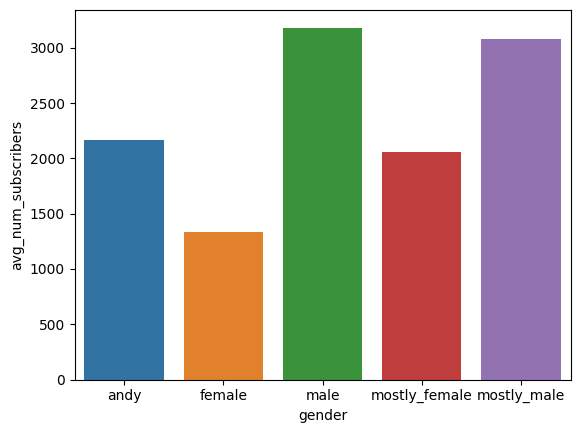

In [41]:
sns.barplot(x = avg_num_subscribers_per_gender.index, y = 'avg_num_subscribers', data = avg_num_subscribers_per_gender)

In [43]:
avg_rating_per_gender = known_instructors.groupby('gender').agg({'avg_rating':'mean'})

In [49]:
avg_rating_per_gender

,avg_rating
gender,
andy,3.573382
female,3.543938
male,3.767441
mostly_female,3.570693
mostly_male,3.733319


<AxesSubplot: xlabel='gender', ylabel='avg_rating'>

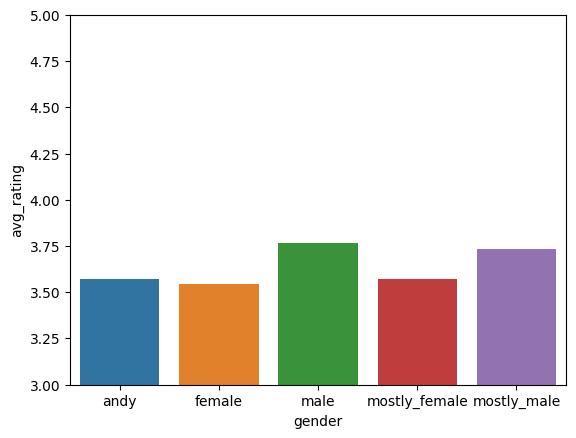

In [53]:
# set the x range to be from 3 to 5
plt.ylim(3,5)
sns.barplot(x = avg_rating_per_gender.index, y = 'avg_rating', data = avg_rating_per_gender)